In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner

In [3]:
file1 = h5py.File('../output/210717-194620_M-I2-A1.h5', 'r')
file2 = h5py.File('../output/210717-194807_M-I2-A2.h5', 'r')

In [43]:
nsteps1 = 1418
nsteps2 = 1430

chain1 = np.array(file1.get('mcmc').get('chain'))[:nsteps1]
chain2 = np.array(file2.get('mcmc').get('chain'))[:nsteps2]

prob1 = np.array(file1.get('mcmc').get('log_prob'))
prob2 = np.array(file2.get('mcmc').get('log_prob'))

accepted1 = np.array(file1.get('mcmc').get('accepted'))
accepted2 = np.array(file2.get('mcmc').get('accepted'))

In [19]:
chain1.shape

(1418, 16, 3)

In [31]:
burnin = 200

chain1_flat = chain1[burnin:,:,:].reshape((nsteps1-burnin)*16,3)
chain2_flat = chain2[burnin:,:,:].reshape((nsteps2-burnin)*16,3)
chain_flat = np.concatenate((chain1_flat,chain2_flat),axis=0)

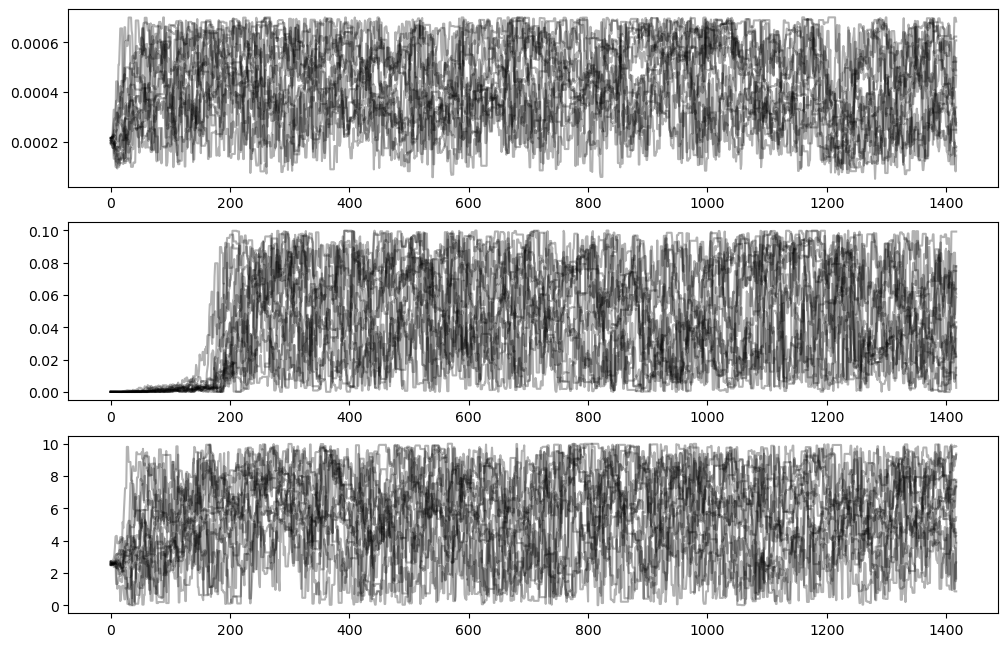

In [24]:
fig, ax = plt.subplots(3,1,figsize=(12,8),dpi=100)
for i in range(3):
    for j in range(16):
        ax[i].plot(chain1[:1450,j,i],c='k',alpha=0.3)

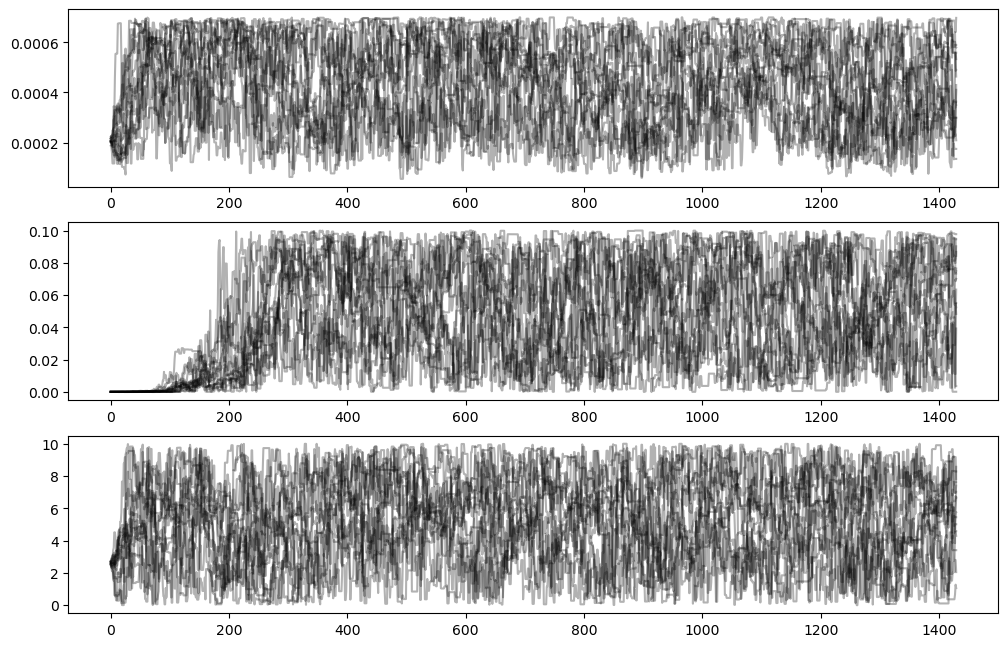

In [25]:
fig, ax = plt.subplots(3,1,figsize=(12,8),dpi=100)
for i in range(3):
    for j in range(16):
        ax[i].plot(chain2[:1450,j,i],c='k',alpha=0.3)

In [27]:
chain_flat.shape

(45568, 3)

In [28]:
1430*16+1418*16

45568

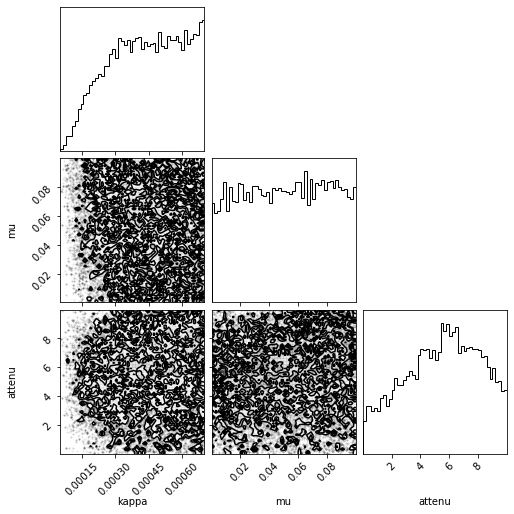

In [35]:
fig = corner.corner(
    chain_flat, labels=['kappa','mu','attenu'],bins=50)

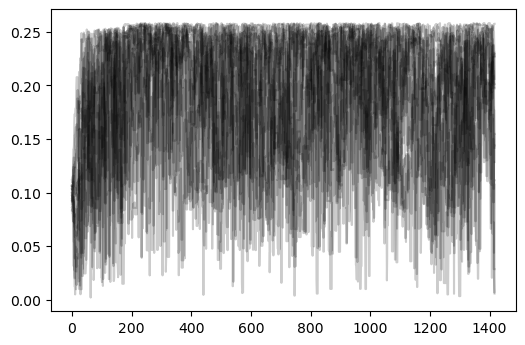

In [50]:
fig, ax = plt.subplots(dpi=100)
ax.plot(np.exp(prob1[:nsteps1]),c='k',alpha=0.2)

plt.show()

In [40]:
l1 = file1.get('mcmc').get

In [42]:
l1.keys()

<KeysViewHDF5 ['accepted', 'chain', 'log_prob']>